# **Credit Card Fraud Detection**

**Objective:**

Predict whether a transaction is fraudlent based on various features of the transaction problem where the target variable is **Fraud**, indicating whether a transaction is fraudlent(1) or legitimate(0).


**Data Dictionary:**

| Column Name           | Type        | Description                                |
| --------------------- | ----------- | ------------------------------------------ |
| `TransactionID`       | Integer     | Unique ID                                  |
| `TransactionAmount`   | Float       | Amount in USD                              |
| `TransactionTime`     | Float       | Hours since first transaction              |
| `MerchantCategory`    | Categorical | 'Retail', 'Online', 'Restaurant', 'Travel' |
| `CustomerAge`         | Integer     | 18–80                                      |
| `CustomerGender`      | Categorical | 'Male', 'Female'                           |
| `CustomerIncome`      | Integer     | 20,000 – 200,000                           |
| `TransactionLocation` | Categorical | 'Urban', 'Suburban', 'Rural'               |
| `PreviousFraudCount`  | Integer     | 0–5                                        |
| `Fraud`               | Binary      | 1 = Fraudulent, 0 = Not Fraudulent         |


**Building a model using Logistic Regression Algorithm**

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Dataset:** https://drive.google.com/file/d/1pechlU3--S2Qvgfh6keoVOeL-VX5r9dZ/view?usp=drive_link



In [ ]:
# load the dataset from a csv file
df=pd.read_csv('fraud_transactions_dataset.csv')
# display the first few rows
df.head()

,TransactionID,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount,Fraud
0,1,380.79,8.97,Travel,68,Male,166232,Rural,4,0
1,2,951.21,26.06,Restaurant,64,Female,185070,Urban,0,0
2,3,734.67,41.91,Restaurant,80,Female,178302,Rural,3,1
3,4,602.67,35.17,Restaurant,64,Female,160148,Suburban,5,1
4,5,164.46,38.73,Travel,21,Female,89341,Suburban,1,0


**Essestial Exploratory Data Analysis(EDA)**

In [ ]:
# summary statistics
df.describe()

,TransactionID,TransactionAmount,TransactionTime,CustomerAge,CustomerIncome,PreviousFraudCount,Fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,495.354060,24.386140,48.926000,110411.768000,2.497000,0.505000
std,288.819436,289.216031,13.995697,18.027688,51999.780486,1.691997,0.500225
min,1.000000,14.590000,0.250000,18.000000,20287.000000,0.000000,0.000000
25%,250.750000,243.610000,11.645000,34.000000,66143.500000,1.000000,0.000000
50%,500.500000,501.840000,24.945000,49.000000,108478.500000,3.000000,1.000000
75%,750.250000,746.880000,36.527500,64.000000,156281.500000,4.000000,1.000000
max,1000.000000,999.720000,47.970000,80.000000,199992.000000,5.000000,1.000000


In [ ]:
# check for missing values
df.isnull().sum()

,0
TransactionID,0
TransactionAmount,0
TransactionTime,0
MerchantCategory,0
CustomerAge,0
CustomerGender,0
CustomerIncome,0
TransactionLocation,0
PreviousFraudCount,0
Fraud,0


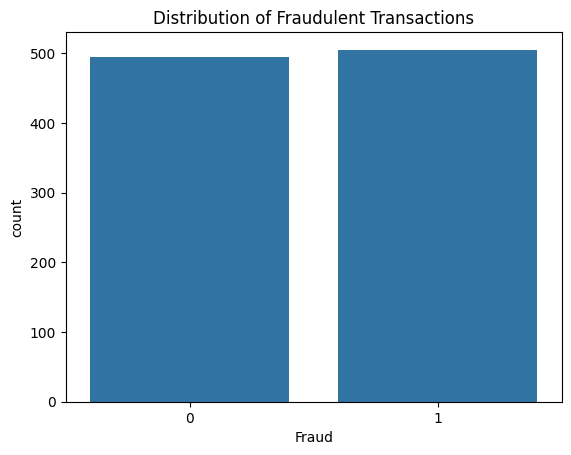

In [ ]:
# distribution of target variable
sns.countplot(x='Fraud', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

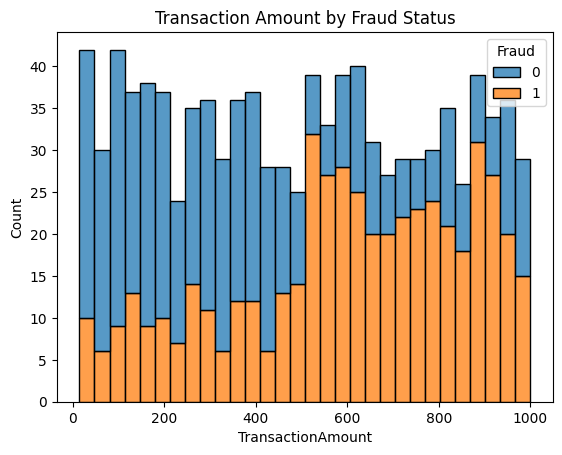

In [ ]:
# distribution of transaction amount by fraud status
sns.histplot(data=df, x='TransactionAmount', hue='Fraud',multiple='stack',bins=30)
plt.title('Transaction Amount by Fraud Status')
plt.show()

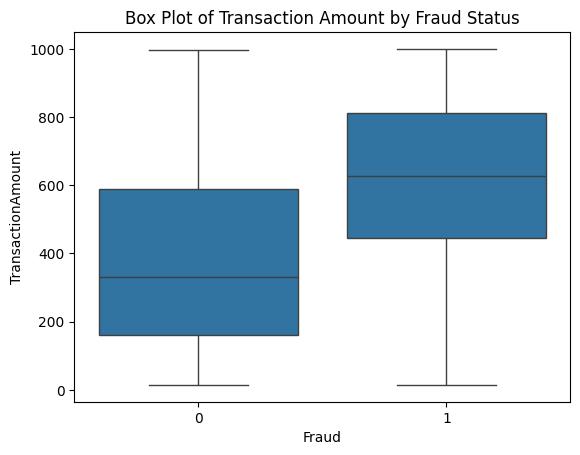

In [ ]:
# box plot for transaction amount by fraud status
sns.boxplot(x='Fraud', y='TransactionAmount', data=df)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.show()

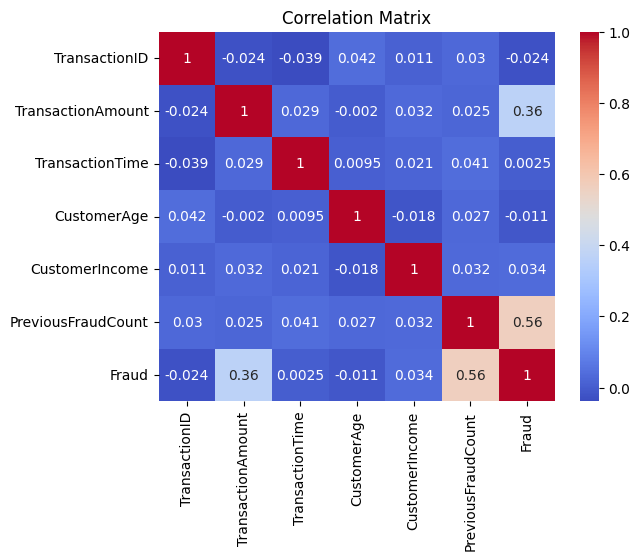

In [ ]:
# correlation matrix
num_cols=list()
for column in df.columns:
  if df[column].dtype!='object':
    num_cols.append(column)

corr_matrix=df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing**

In [ ]:
# encode categorical variables
label_encoders={}
for column in ['MerchantCategory', 'CustomerGender', 'TransactionLocation']:
  le=LabelEncoder()
  df[column]=le.fit_transform(df[column])
  label_encoders[column]=le

  # features and target
  X=df.drop(['TransactionID', 'Fraud'], axis=1)
  y=df['Fraud']


In [ ]:
  X.head()

,TransactionAmount,TransactionTime,MerchantCategory,CustomerAge,CustomerGender,CustomerIncome,TransactionLocation,PreviousFraudCount
0,380.79,8.97,3,68,1,166232,0,4
1,951.21,26.06,1,64,0,185070,2,0
2,734.67,41.91,1,80,0,178302,0,3
3,602.67,35.17,1,64,0,160148,1,5
4,164.46,38.73,3,21,0,89341,1,1


In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# feature scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test,logreg_pred))

Logistic Regression Accuracy: 79.33

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       145
           1       0.80      0.81      0.80       155

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



Text(0.5, 36.72222222222221, 'Predicted')

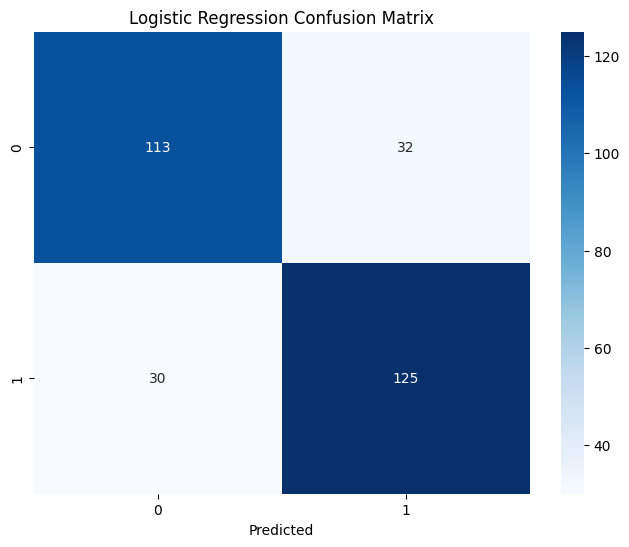

In [ ]:
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logreg_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
